In [7]:
import torch
import torch.nn as nn
from collections import OrderedDict
import matplotlib.pyplot as plt

model = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 3)),  # first hidden layer with 3 neurons
    ('ReLU', nn.ReLU()),          # relu activation function
    ('output', nn.Linear(3, 2)),  # output layer with 3 neurons
    ('sigmoid', nn.Sigmoid())     # sigmoid activation function
]))
print(model)

Sequential(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (ReLU): ReLU()
  (output): Linear(in_features=3, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [8]:
data_in = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [9]:
data_target = torch.tensor([[0,0], [0,1],[0,1],[1,0]], dtype=torch.float)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [10]:
criterion = nn.MSELoss() # using Mean Square Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # using stochastic gradient descent with a learning rate og 0.1

In [11]:
# Train the model
losses = []
for epoch in range(10000):
    # reset the gradients to zero before each forward and backward pass
    optimizer.zero_grad()  
    # forward pass
    outputs = model(data_in)
    # calculate loss
    loss = criterion(outputs, data_target)
    # backward pass
    loss.backward()          
    # update weights
    optimizer.step()         
    losses.append(loss.item())
    
    # accuracy
    predicted_classes = (outputs.round() == data_target)
    accuracy = predicted_classes.all(dim=1).float().mean().item()
    if accuracy == 1:
        print(f"Model reached 100% accuracy at epoch {epoch+1}")
        break

Model reached 100% accuracy at epoch 1120


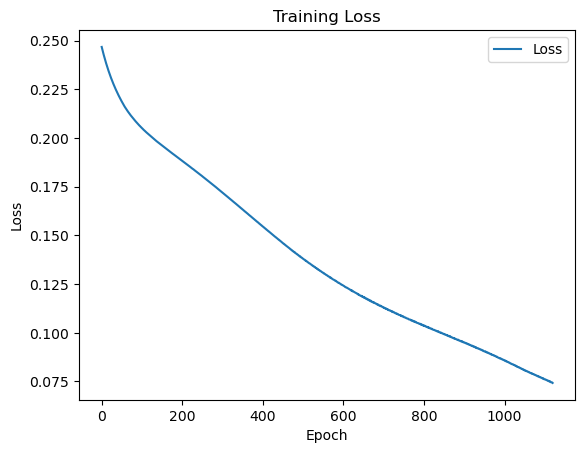

In [13]:
# visualize the resuts
import numpy as np

# Plot loss curve
plt.figure()
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [14]:
# Print model weights
print("Model weights:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model weights:
hidden.weight tensor([[ 1.4675,  1.4693],
        [ 0.0596, -1.0412],
        [ 0.8899,  0.6637]])
hidden.bias tensor([-1.4662e+00,  9.8185e-01,  1.1822e-03])
output.weight tensor([[ 1.7709, -1.1303,  0.7544],
        [-1.8554, -0.2895,  0.7196]])
output.bias tensor([-1.7488,  0.2813])
